In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
fully_connected_mse = [0.035, 0.035, 0.035]
fully_connected_val_mse = [0.07, 0.05, 0.04]
fully_connected_test_mse = [0.07, 0.05, 0.04]

conv_fc_mse = [0.031, 0.038, 0.030]
conv_fc_val_mse = [0.09, 0.06, 0.08]
conv_fc_test_mse = [0.08, 0.06, 0.08]

enc_conv_mse = [0.011, 0.016, 0.016]
enc_conv_val_mse = [0.06, 0.05, 0.03]
enc_conv_test_mse = [0.054, 0.05, 0.028]

n_data_points = [10000, 30000, 80000]

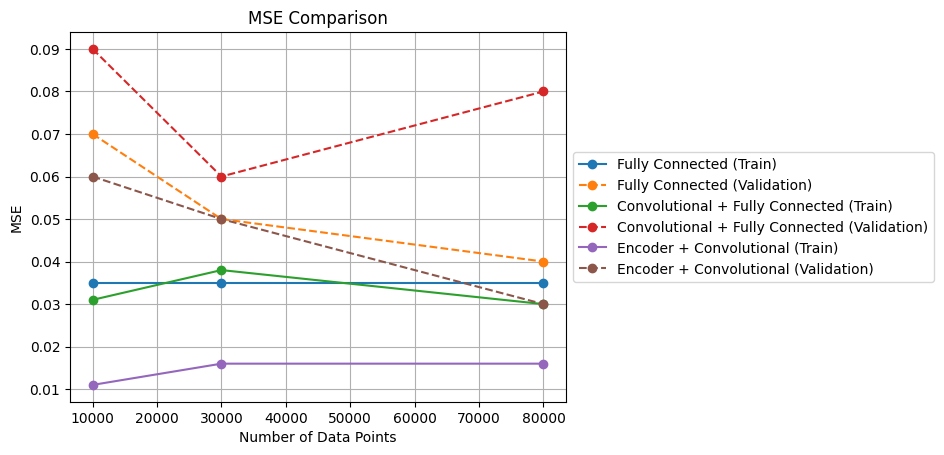

In [12]:
plt.plot(n_data_points, fully_connected_mse, marker='o', label='Fully Connected (Train)')
plt.plot(n_data_points, fully_connected_val_mse, marker='o', linestyle='--', label='Fully Connected (Validation)')

# Convolutional + Fully Connected
plt.plot(n_data_points, conv_fc_mse, marker='o', label='Convolutional + Fully Connected (Train)')
plt.plot(n_data_points, conv_fc_val_mse, marker='o', linestyle='--', label='Convolutional + Fully Connected (Validation)')

# Encoder + Convolutional
plt.plot(n_data_points, enc_conv_mse, marker='o', label='Encoder + Convolutional (Train)')
plt.plot(n_data_points, enc_conv_val_mse, marker='o', linestyle='--', label='Encoder + Convolutional (Validation)')

plt.title('MSE Comparison')
plt.xlabel('Number of Data Points')
plt.ylabel('MSE')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

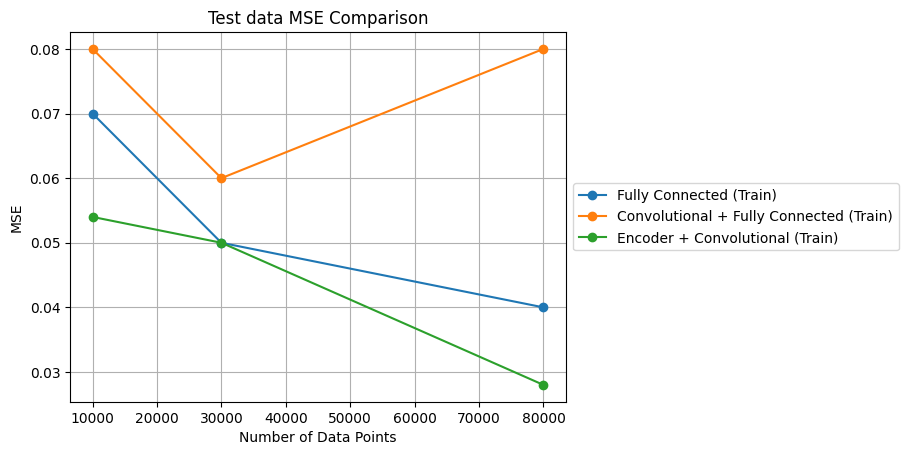

In [13]:
plt.plot(n_data_points, fully_connected_test_mse, marker='o', label='Fully Connected (Train)')

# Convolutional + Fully Connected
plt.plot(n_data_points, conv_fc_test_mse, marker='o', label='Convolutional + Fully Connected (Train)')

# Encoder + Convolutional
plt.plot(n_data_points, enc_conv_test_mse, marker='o', label='Encoder + Convolutional (Train)')

plt.title('Test data MSE Comparison')
plt.xlabel('Number of Data Points')
plt.ylabel('MSE')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

In [4]:
from constants import ORIGINAL_FLUXES_FILE, \
                      ORIGINAL_COEFFS_FILE, \
                      ORIGINAL_SLM_FOLDER, \
                      ORIGINAL_AMPLITUDE_FILENAME, \
                      ORIGINAL_PHASE_FILENAME, \
                      TRAIN_FILE_SUFFIXES, \
                      NUMPY_SUFFIX, \
                      VALIDATION_FILE_SUFFIX, \
                      TEST_FILE_SUFFIX, \
                      TRAIN_FC_FLUXES_PATH, \
                      VALIDATION_FC_FLUXES_PATH, \
                      TEST_FC_FLUXES_PATH, \
                      TRAIN_FC_AMP_PHASE_PATH, \
                      VALIDATION_FC_AMP_PHASE_PATH, \
                      TEST_FC_AMP_PHASE_PATH

In [5]:
import numpy as np
import matplotlib.pyplot as plt

(200000, 4)


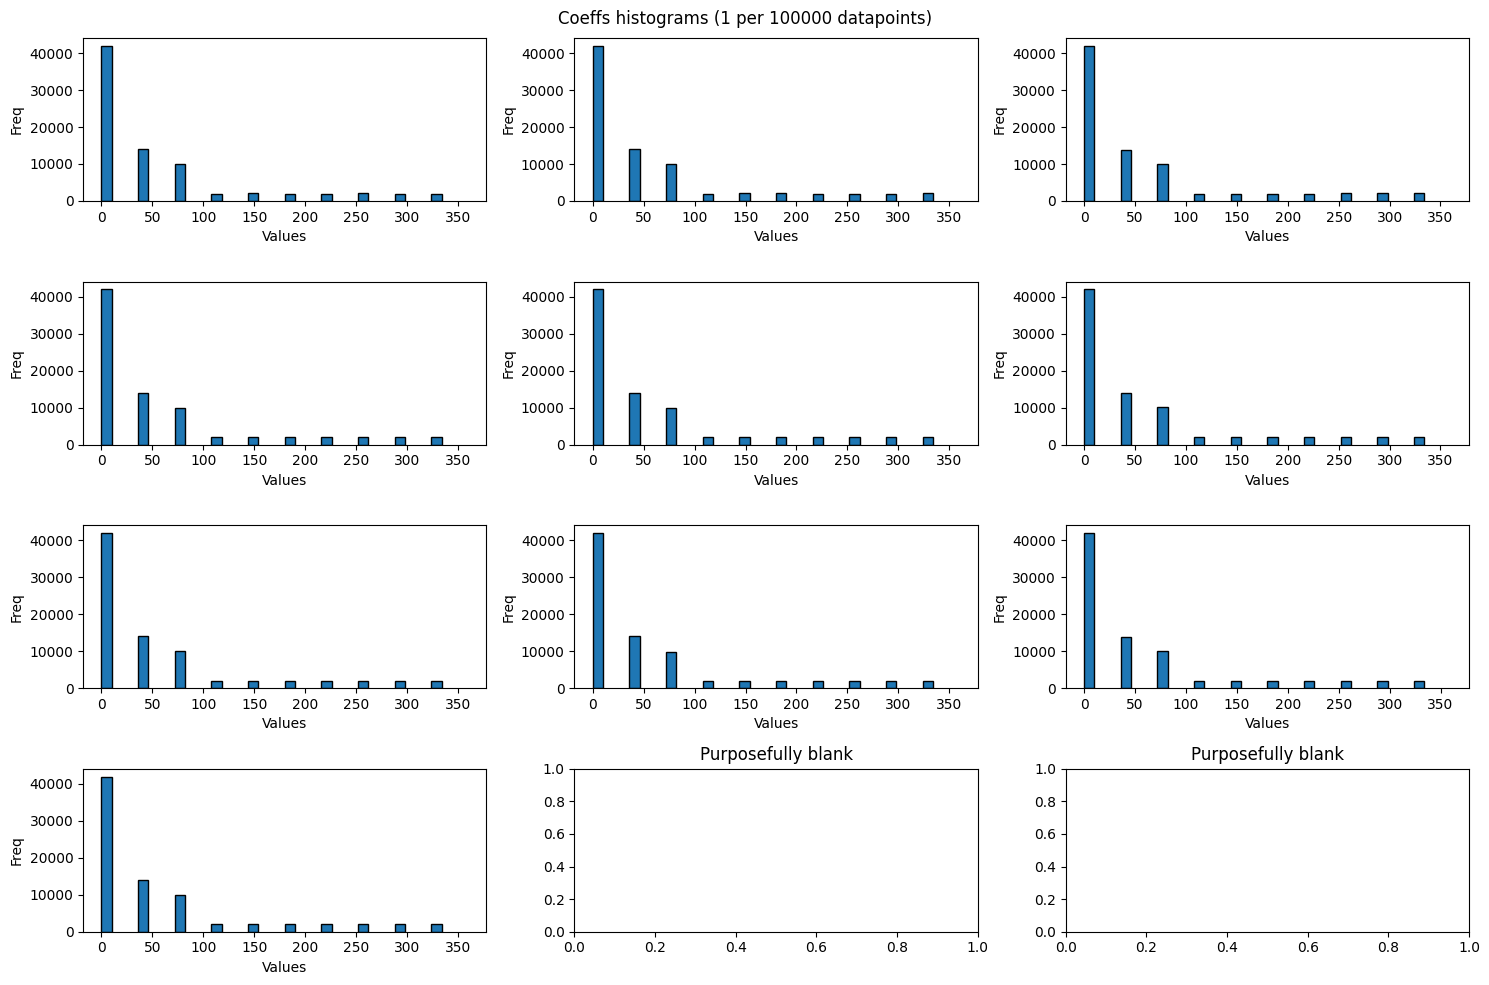

In [8]:
print(coeffs.shape)
split_arr = np.array_split(coeffs, 10)

# Plot 9 histograms
fig, axs = plt.subplots(4, 3, figsize=(15, 10))
fig.suptitle('Coeffs histograms (1 per 100000 datapoints)')

for i, ax in enumerate(axs.flat):
    if i > 9:
        ax.set_title(f'Purposefully blank')
        continue
        
    ax.hist(split_arr[i].flatten(), bins=10, edgecolor='black', width=10)
    ax.set_xlabel('Values')
    ax.set_ylabel('Freq')
    #ax.set_ylim()

plt.tight_layout()
plt.show()

In [9]:
fluxes_splitter = np.load(ORIGINAL_FLUXES_FILE)
split_arr = np.array_split(fluxes_splitter, 10)

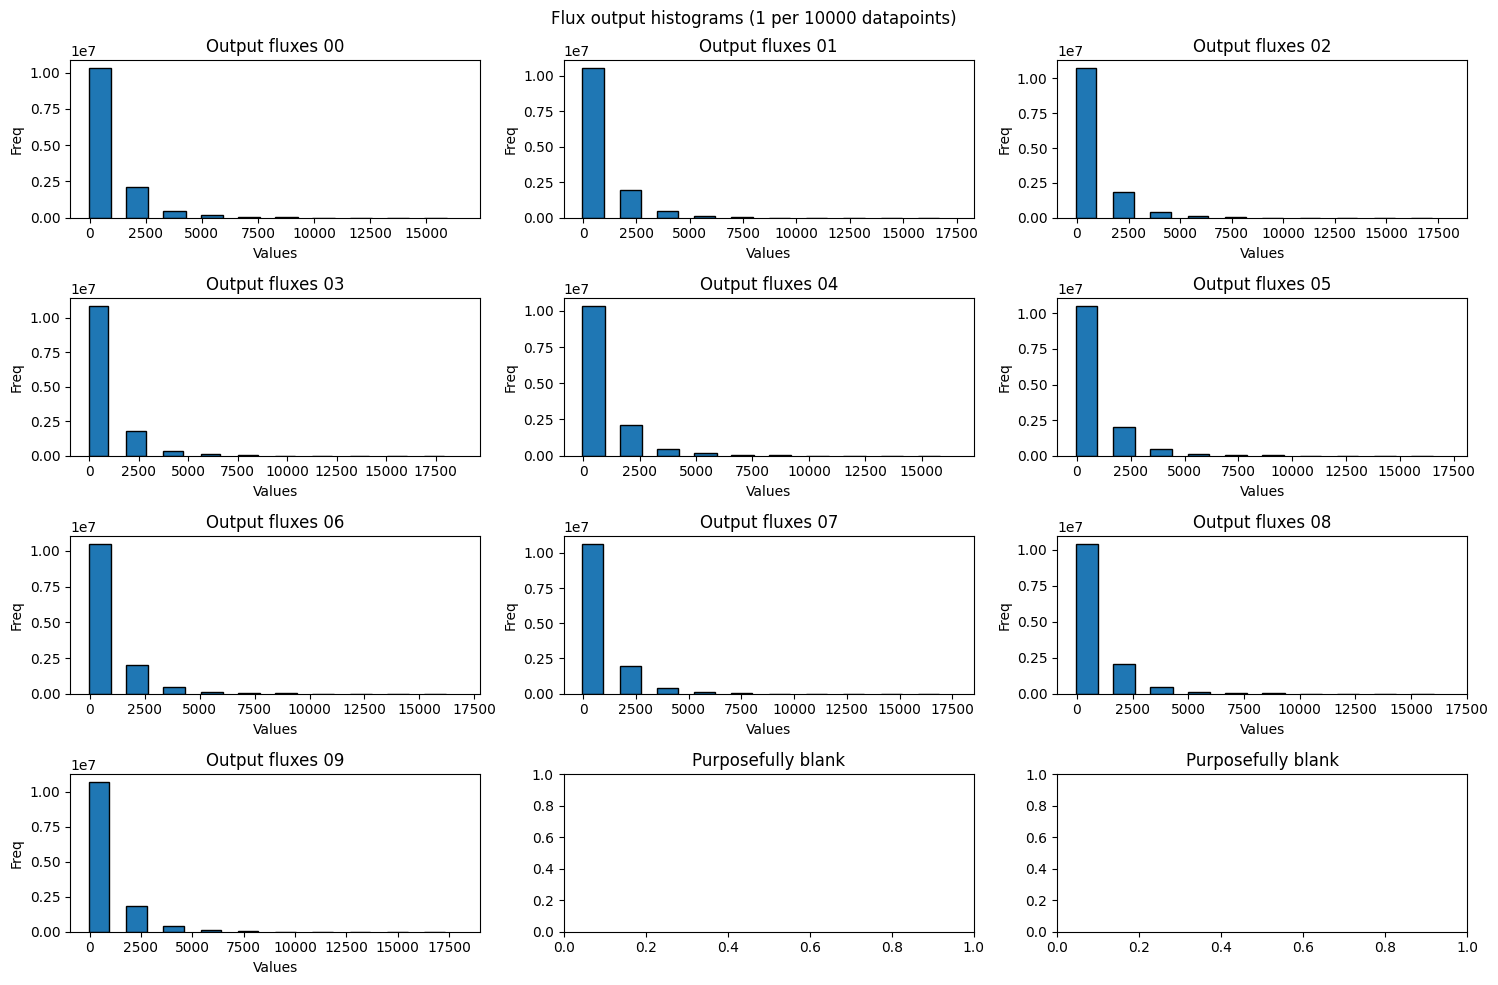

In [10]:
# Plot 9 histograms
fig, axs = plt.subplots(4, 3, figsize=(15, 10))
fig.suptitle('Flux output histograms (1 per 10000 datapoints)')

for i, ax in enumerate(axs.flat):
    if i > 9:
        ax.set_title(f'Purposefully blank')
        continue
    ax.hist(split_arr[i].flatten(), bins=10, edgecolor='black', width=1000)
    ax.set_title(f'Output fluxes 0{i}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Freq')

plt.tight_layout()
plt.show()

In [11]:
# Load data
amplitudes = []
phases = []

for file_number in TRAIN_FILE_SUFFIXES + [VALIDATION_FILE_SUFFIX] + [TEST_FILE_SUFFIX]:
    amp_filename = f"{ORIGINAL_SLM_FOLDER}{file_number}/{ORIGINAL_AMPLITUDE_FILENAME}"
    phase_filename = f"{ORIGINAL_SLM_FOLDER}{file_number}/{ORIGINAL_PHASE_FILENAME}"
    amplitudes.append(np.float32(np.load(amp_filename)))
    phases.append(np.float32(np.load(phase_filename)))

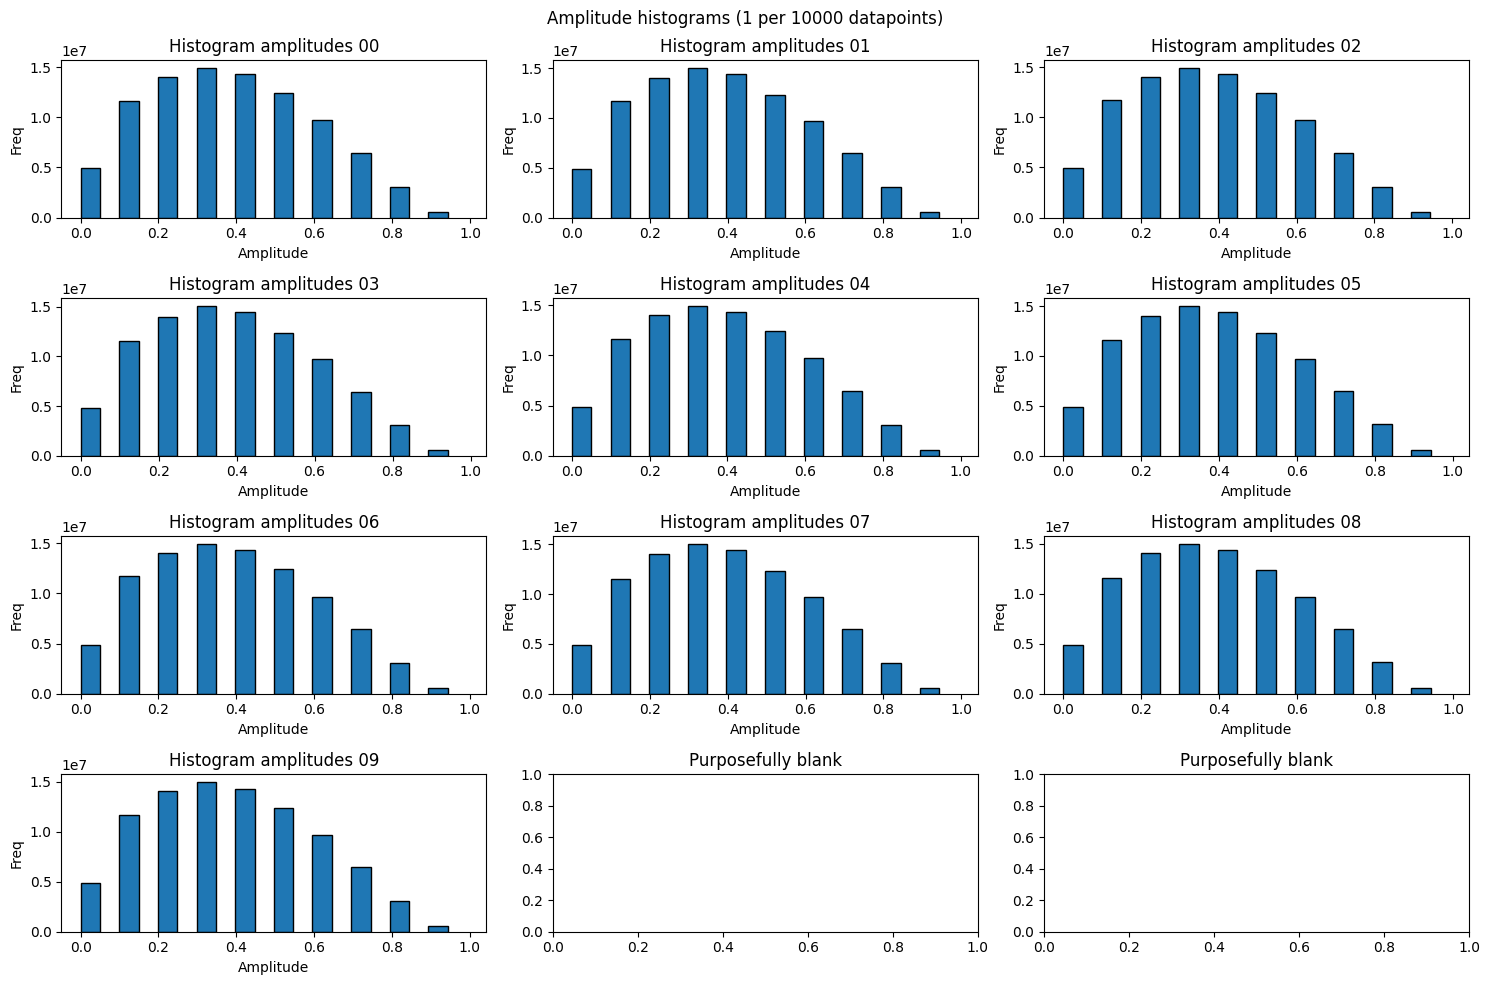

In [21]:
# Plot 9 histograms
fig, axs = plt.subplots(4, 3, figsize=(15, 10))
fig.suptitle('Amplitude histograms (1 per 10000 datapoints)')

for i, ax in enumerate(axs.flat):
    if i > 9:
        ax.set_title(f'Purposefully blank')
        continue
    ax.hist(amplitudes[i].flatten(), bins=10, edgecolor='black', width=0.05)
    ax.set_title(f'Histogram amplitudes 0{i}')
    ax.set_xlabel('Amplitude')
    ax.set_ylabel('Freq')

plt.tight_layout()
plt.show()

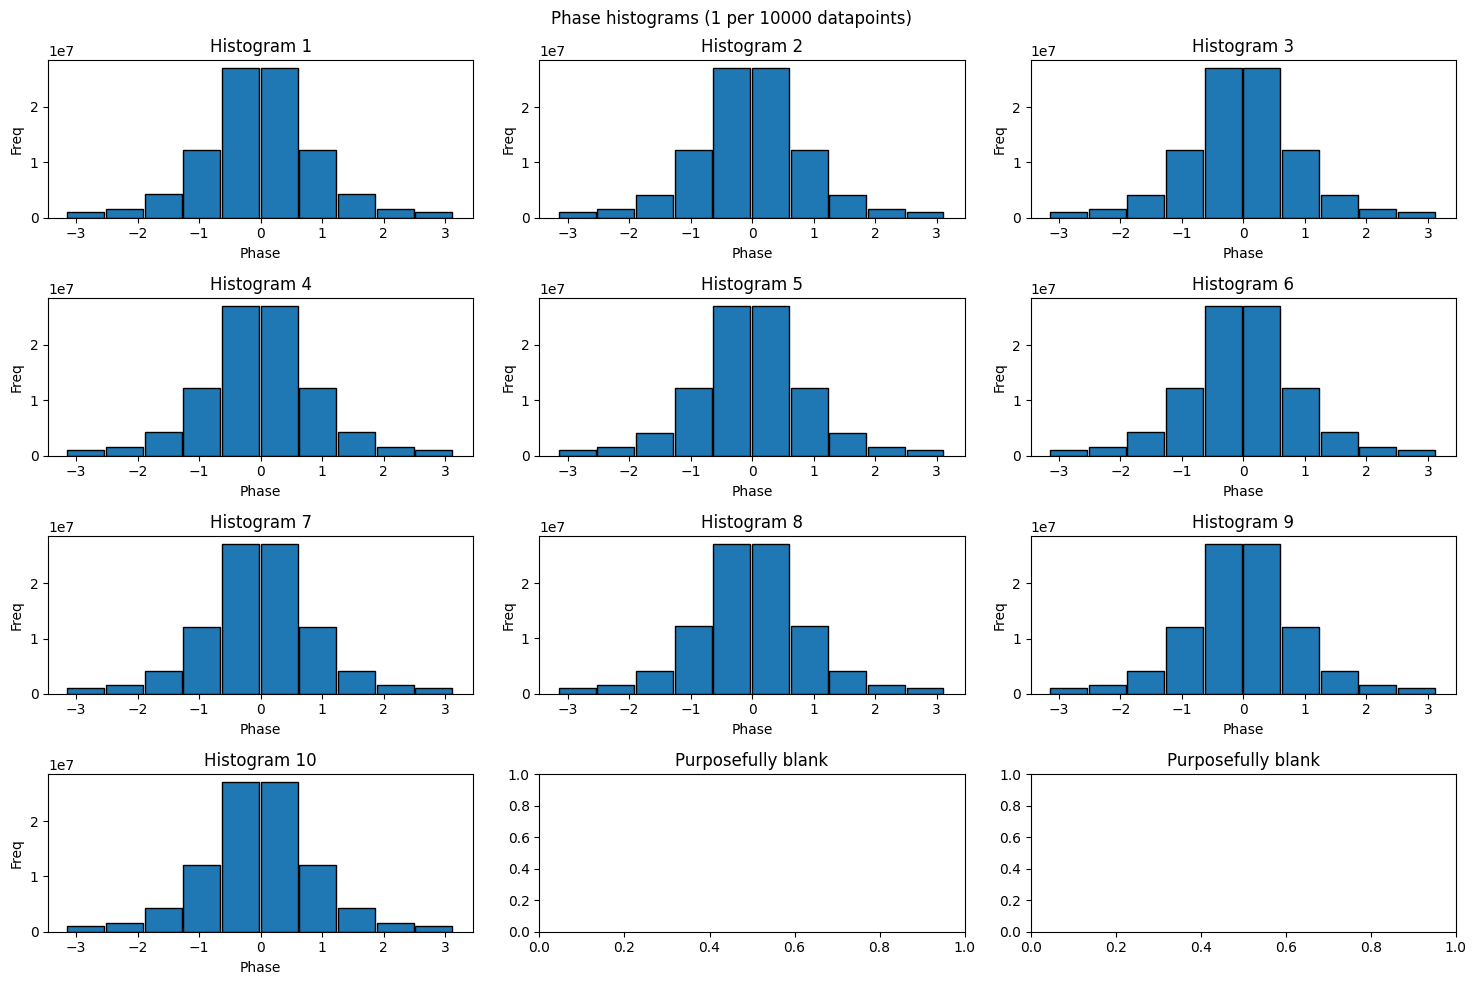

In [13]:
# Plot 9 histograms
fig, axs = plt.subplots(4, 3, figsize=(15, 10))
fig.suptitle('Phase histograms (1 per 10000 datapoints)')

for i, ax in enumerate(axs.flat):
    if i > 9:
        ax.set_title(f'Purposefully blank')
        continue
    ax.hist(phases[i].flatten(), bins=10, edgecolor='black', width=0.6)
    ax.set_title(f'Histogram {i+1}')
    ax.set_xlabel('Phase')
    ax.set_ylabel('Freq')

plt.tight_layout()
plt.show()

In [14]:
# Load data
fluxes = []
amplitudes_phases = []

for file_number in TRAIN_FILE_SUFFIXES:
    flux_filename = f"{TRAIN_FC_FLUXES_PATH}{file_number}{NUMPY_SUFFIX}"
    amp_phase_filename = f"{TRAIN_FC_AMP_PHASE_PATH}{file_number}{NUMPY_SUFFIX}"
    fluxes.append(np.float32(np.load(flux_filename)))
    amplitudes_phases.append(np.float32(np.load(amp_phase_filename)))
    
fluxes.append(np.float32(np.load(VALIDATION_FC_FLUXES_PATH)))
fluxes.append(np.float32(np.load(TEST_FC_FLUXES_PATH)))

amplitudes_phases.append(np.float32(np.load(VALIDATION_FC_AMP_PHASE_PATH)))
amplitudes_phases.append(np.float32(np.load(TEST_FC_AMP_PHASE_PATH)))


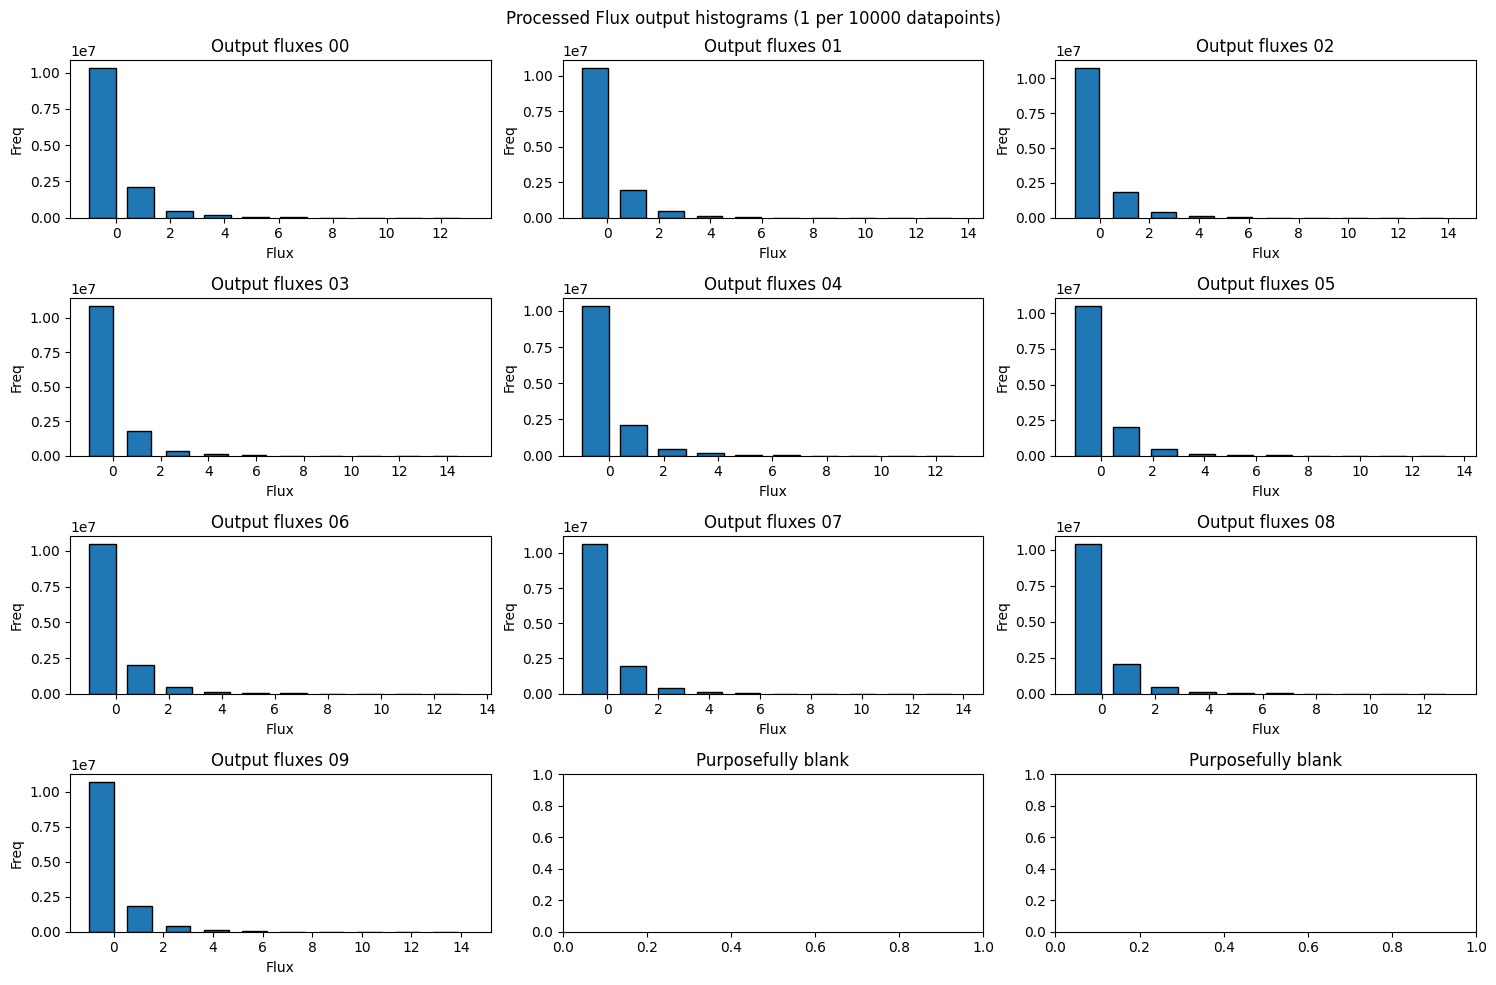

In [15]:
# Plot 9 histograms
fig, axs = plt.subplots(4, 3, figsize=(15, 10))
fig.suptitle('Processed Flux output histograms (1 per 10000 datapoints)')

for i, ax in enumerate(axs.flat):
    if i > 9:
        ax.set_title(f'Purposefully blank')
        continue
    ax.hist(fluxes[i].flatten(), bins=10, edgecolor='black', width=1)
    ax.set_title(f'Output fluxes 0{i}')
    ax.set_xlabel('Flux')
    ax.set_ylabel('Freq')

plt.tight_layout()
plt.show()

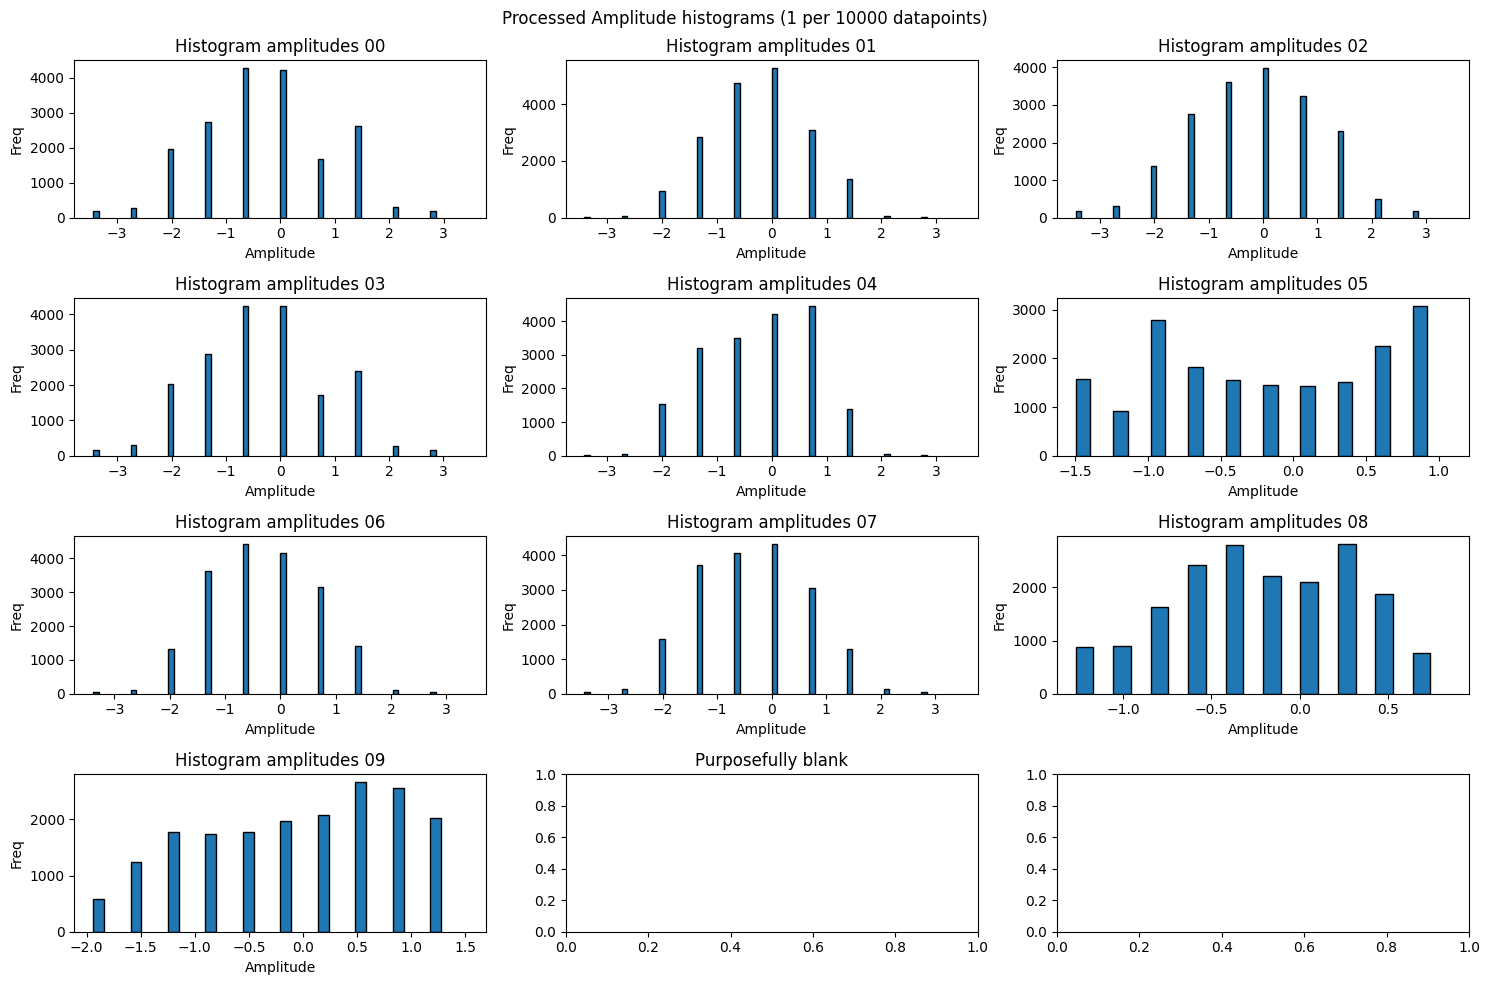

In [20]:
# Plot 9 histograms
fig, axs = plt.subplots(4, 3, figsize=(15, 10))
fig.suptitle('Processed Amplitude histograms (1 per 10000 datapoints)')

for i, ax in enumerate(axs.flat):
    if i > 9:
        ax.set_title(f'Purposefully blank')
        break
    ax.hist(amplitudes_phases[i][0].flatten(), bins=10, edgecolor='black', width=0.1)
    ax.set_title(f'Histogram amplitudes 0{i}')
    ax.set_xlabel('Amplitude')
    ax.set_ylabel('Freq')

plt.tight_layout()
plt.show()

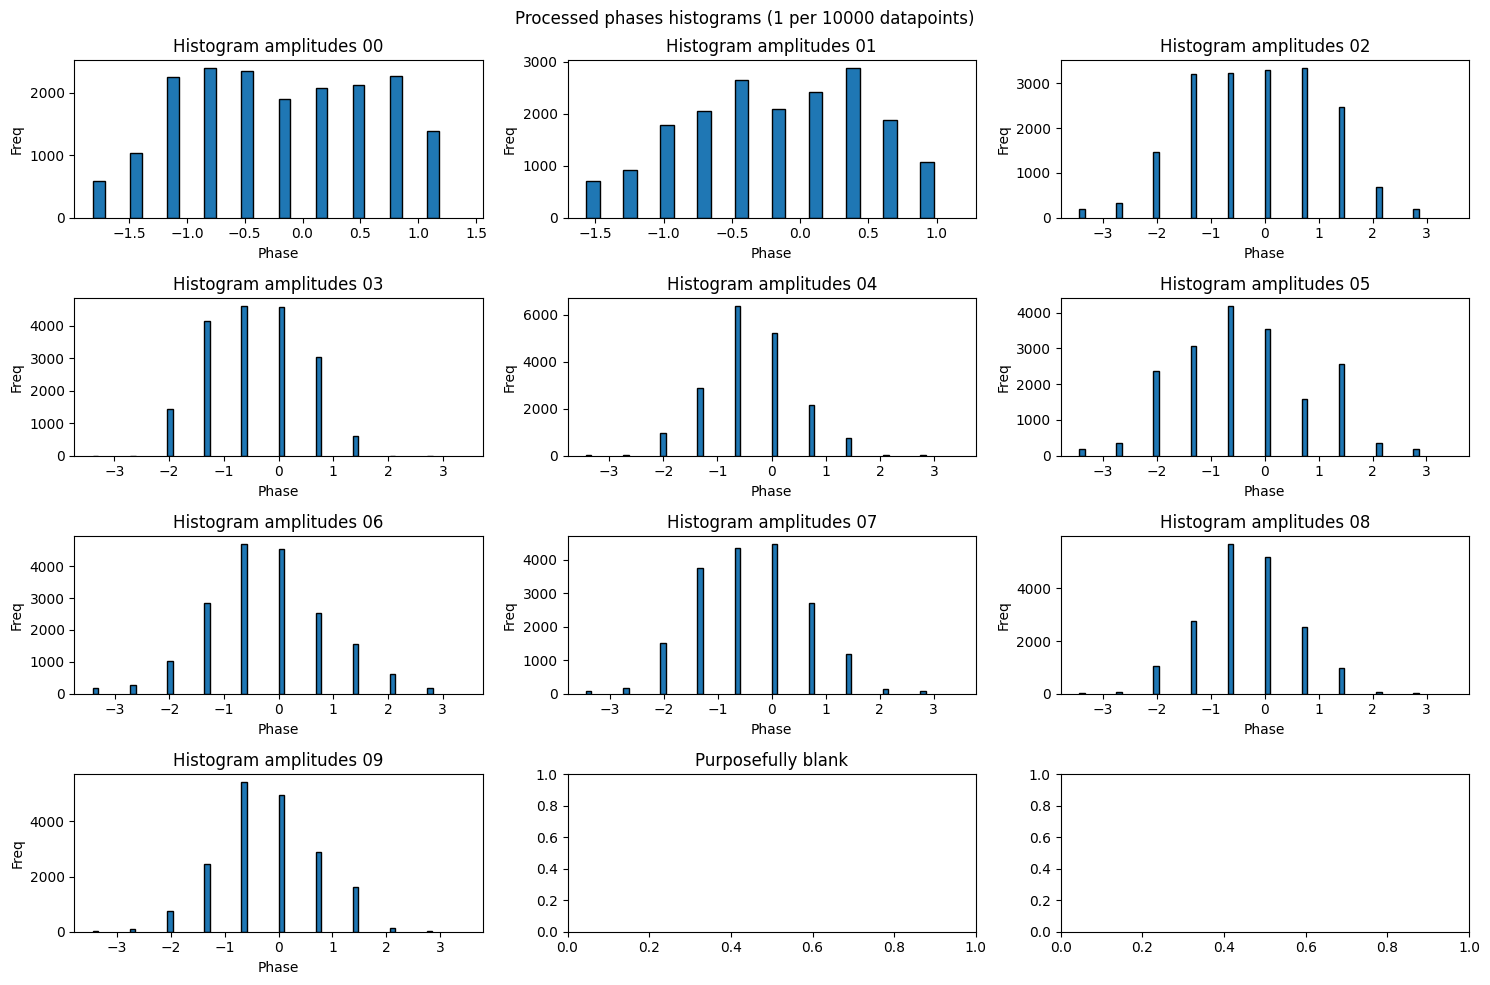

In [18]:
# Plot 9 histograms
fig, axs = plt.subplots(4, 3, figsize=(15, 10))
fig.suptitle('Processed phases histograms (1 per 10000 datapoints)')

for i, ax in enumerate(axs.flat):
    if i > 9:
        ax.set_title(f'Purposefully blank')
        break
    ax.hist(amplitudes_phases[i][1].flatten(), bins=10, edgecolor='black', width=0.1)
    ax.set_title(f'Histogram amplitudes 0{i}')
    ax.set_xlabel('Phase')
    ax.set_ylabel('Freq')

plt.tight_layout()
plt.show()